# Cleaning and investigating the data

* Import the necessary libraries

In [1]:
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

import pickle

from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from statsmodels.formula.api import ols

from functions import *

* Import the data

In [2]:
df = pd.read_csv('data/online_news_popularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


* Check out column names

In [3]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

* Remove spaces and shorten/clarify some column names

In [4]:
k = list(df.columns)
v = [column.strip() for column in df.columns]

In [5]:
renamer = dict(zip(k, v))
new_names = {'num_hrefs': 'num_links',
             'num_self_hrefs': 'num_self_links',
             'n_unique_tokens': 'rate_unique_tokens',
             'n_non_stop_words': 'rate_non_stop_words',
             'n_non_stop_unique_tokens': 'rate_non_stop_unique_tokens',
             'data_channel_is_lifestyle': 'lifestyle',
             'data_channel_is_entertainment': 'entertainment',
             'data_channel_is_bus': 'business',
             'data_channel_is_socmed': 'social_media',
             'data_channel_is_tech': 'tech',
             'data_channel_is_world': 'world',
             'self_reference_min_shares': 'self_ref_min_shares',
             'self_reference_max_shares': 'self_ref_max_shares',
             'self_reference_avg_sharess': 'self_ref_avg_shares',
             'weekday_is_monday': 'monday',
             'weekday_is_tuesday': 'tuesday',
             'weekday_is_wednesday': 'wednesday',
             'weekday_is_thursday': 'thursday',
             'weekday_is_friday': 'friday',
             'weekday_is_saturday': 'saturday',
             'weekday_is_sunday': 'sunday',
                }

In [6]:
df.rename(columns=renamer, inplace=True)
df.rename(columns=new_names, inplace=True)

In [7]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polar

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           39644 non-null  object 
 1   timedelta                     39644 non-null  float64
 2   n_tokens_title                39644 non-null  float64
 3   n_tokens_content              39644 non-null  float64
 4   rate_unique_tokens            39644 non-null  float64
 5   rate_non_stop_words           39644 non-null  float64
 6   rate_non_stop_unique_tokens   39644 non-null  float64
 7   num_links                     39644 non-null  float64
 8   num_self_links                39644 non-null  float64
 9   num_imgs                      39644 non-null  float64
 10  num_videos                    39644 non-null  float64
 11  average_token_length          39644 non-null  float64
 12  num_keywords                  39644 non-null  float64
 13  l

In [9]:
to_int = ['num_links', 'num_self_links', 'num_imgs', 'num_videos', 'num_keywords', 'lifestyle', 'entertainment',
          'business', 'social_media', 'tech', 'world', 'self_ref_min_shares', 'self_ref_max_shares', 
          'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
          ]
df[to_int] = df[to_int].astype('int64')

* Take a look at the target variable.

In [10]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125aaa8d0>]],
      dtype=object)

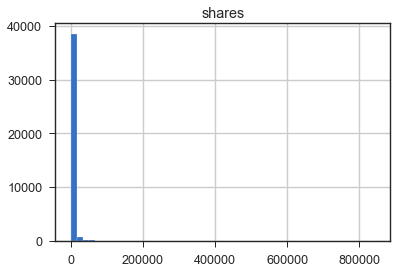

In [11]:
df.hist('shares',bins=50)

* See if the log of 'shares' normalizes it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121df20b8>]],
      dtype=object)

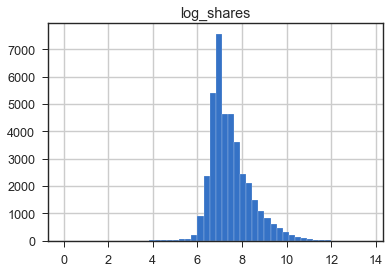

In [12]:
df['log_shares'] = df.shares.apply(lambda x: np.log(x))
df.hist('log_shares', bins=50)

* Data seems pretty clean, so we'll take a preliminary look at some numbers.

In [13]:
untouched_features = list(df.columns)
untouched_features.remove('shares')
untouched_features.remove('log_shares')
untouched_features.remove('url')
untouched_features.remove('monday')
untouched_features.remove('lifestyle')
untouched_features.remove('LDA_00')
# untouched_features.remove('timedelta')

col_list = '+'.join(untouched_features)
f = 'log_shares~' + col_list
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     104.4
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        17:37:39   Log-Likelihood:                -50711.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39588   BIC:                         1.020e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        6.7672      0.068     99.461      0.000       6.634       6.901
timedelta                     6.713e-05   2.97e-05      2.264      0.024    9.01e-06       0.000
n_tokens_title                   0.0083      0.002      3.777      0.000       0.004       0.013
n_tokens_content              4.052e-05   1.69e-05      2.396      0.017    7.37e-06    7.37e-05
rate_unique_tokens               0.2043      0.145      1.412      0.158      -0.079       0.488
rate_non_stop_words              0.0378      0.049      0.768      0.442      -0.059       0.134
rate_non_stop_unique_tokens     -0.2785      0.122     -2.274      0.023      -0.518      -0.039
num_links                        0.0042      0.001      8.247      0.000       0.003       0.005
num_self_links                  -0.0077      0.001     -5.724      0.000      -0.010      -0.005
num_imgs                         0.0025      0.001      3.626      0.000       0.001       0.004
num_videos                       0.0019      0.001      1.606      0.108      -0.000       0.004
average_token_length            -0.0910      0.018     -5.043      0.000      -0.126      -0.056
num_keywords                     0.0121      0.003      4.313      0.000       0.007       0.018
entertainment                   -0.1559      0.018     -8.607      0.000      -0.191      -0.120
business                        -0.1117      0.024     -4.596      0.000      -0.159      -0.064
social_media                     0.2098      0.024      8.630      0.000       0.162       0.257
tech                             0.1695      0.020      8.355      0.000       0.130       0.209
world                            0.0132      0.024      0.544      0.586      -0.034       0.061
kw_min_min                       0.0009      0.000      7.262      0.000       0.001       0.001
kw_max_min                    1.713e-05   3.81e-06      4.496      0.000    9.66e-06    2.46e-05
kw_avg_min                      -0.0001   2.34e-05     -5.465      0.000      -0.000   -8.21e-05
kw_min_max                   -3.726e-07   8.89e-08     -4.189      0.000   -5.47e-07   -1.98e-07
kw_max_max                    4.518e-08   4.46e-08      1.013      0.311   -4.23e-08    1.33e-07
kw_avg_max                   -2.577e-07   6.36e-08     -4.051      0.000   -3.82e-07   -1.33e-07
kw_min_avg                   -5.083e-05   5.72e-06     -8.879      0.000    -6.2e-05   -3.96e-05
kw_max_avg                   -4.212e-05   1.91e-06    -22.007      0.000   -4.59e-05   -3.84e-05
kw_avg_avg                       0.0003   1.09e-05     30.915      0.000       0.000       0.000
self_ref_min_shares           7.359e-07   5.69e-07      1.292      0.196    -3.8e-07    1.85e-06
self_ref_max_shares          -8.753e-09   3.09e-07     -0.028      0.977   -

* R<sup>2</sup> value is very low (0.127), so let's see if we can bring it up a bit.
* A closer looks at some of the columns shows some suspicious values of 0 and 1 for the rate of certain tokens and token types. Also some values are below 1 for columns that measure in article shares, even though the minimum value for shares is 1.
    * Reassign those 0s and 1s to each column's median value.
    * Reassign any less-than 1s in columns measuring in shares to 1.

In [14]:
df.kw_min_min.describe()

count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

In [15]:
less_set_to_one_cols = ['kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
                        'kw_avg_avg']

great_set_to_one_cols = ['rate_unique_tokens', 'rate_non_stop_unique_tokens']

zero_to_median_cols = ['average_token_length', 'n_tokens_content', 'rate_unique_tokens', 'global_subjectivity',
                       'global_rate_positive_words', 'rate_positive_words', 'rate_negative_words', 
                       'avg_positive_polarity', 'avg_negative_polarity']

one_to_median_cols = ['rate_non_stop_unique_tokens', 'rate_positive_words', 'rate_negative_words', 
                      'avg_positive_polarity']

shares_cols = ['kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
               'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares']

In [16]:
for column in less_set_to_one_cols:
    less_set_to_one(df, column)
    
for column in great_set_to_one_cols:
    great_set_to_one(df, column)
    
for column in zero_to_median_cols:
    zero_to_median(df, column)
    
for column in one_to_median_cols:
    one_to_median(df, column)
    
neg_one_to_median(df, 'avg_negative_polarity')

for column in shares_cols:
    log_col(df, column)

In [17]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_max', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'sh

In [18]:
cleaner_features = list(df.columns)
cleaner_features.remove('shares')
cleaner_features.remove('log_shares')
cleaner_features.remove('url')
cleaner_features.remove('monday')
cleaner_features.remove('lifestyle')
cleaner_features.remove('LDA_00')
# untouched_features.remove('timedelta')

col_list = '+'.join(cleaner_features)
f = 'log_shares~' + col_list
model = ols(formula=f, data=df).fit()
model.summary()

MissingDataError: exog contains inf or nans

* A slightly higher F-statistic and adjusted R<sup>2</sup>, but no movement on the actual R<sup>2</sup>.
* Let's try categorizing the image and video columns, since the number itself doesn't seem to hold much value.

In [ ]:
df['has_img'] = np.where(df.num_imgs > 0, 1, 0)
df.boxplot('log_shares', 'has_img')

In [ ]:
df['has_video'] = np.where(df.num_videos > 0, 1, 0)
df.boxplot('log_shares', 'has_video')

* Drop unnecessary data, suspicious data, and at least one dummy variable from each category.
    * 'rate_non_stop_words' (the rate of non-stop words in the content) only has values of 0 and 1, though values should seemingly be spread out between 0 and 1.

In [19]:
features = df.drop(columns=['url', 'timedelta', 'shares', 'num_imgs', 'num_videos',
                            'rate_non_stop_words', 'kw_max_max', 'kw_min_min', 'self_ref_min_shares',
                            'self_ref_max_shares',
                            'monday', 'lifestyle',  ])

KeyError: "['self_ref_min_shares' 'self_ref_max_shares'] not found in axis"

In [20]:
features.columns

NameError: name 'features' is not defined

In [21]:
f_list = list(features.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=features).fit()
model.summary()

NameError: name 'features' is not defined

* Let's try removing some very high P-values.

In [22]:
def log_col(df, column):
    new_col = 'log_' + column
    df[new_col] = df[column].apply(lambda x: np.log(x))
    df[new_col] = np.where(df[column] == 0, df[column].median(), df[column])
    df.drop(columns=column, inplace=True)

In [23]:
df['log_kw_max_max'] = df['kw_avg_max'].apply(lambda x: np.log(x))
df['log_kw_max_max'] = np.where(df['log_kw_max_max'] == 0, df['log_kw_max_max'].median(), df['log_kw_max_max'])

KeyError: 'kw_avg_max'

KeyError: 'log_kw_max_max'

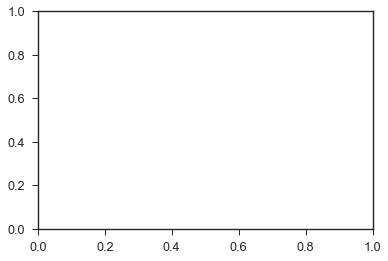

In [24]:
df.plot.scatter('log_kw_max_max', 'log_shares')

In [ ]:
f = 'log_shares~log_kw_avg_max'
model = ols(formula=f, data=df).fit()
model.summary()

In [25]:
df.average_token_length.unique()

array([4.6803653 , 4.91372549, 4.39336493, ..., 4.52312139, 4.4054878 ,
       4.97507331])

In [26]:
df.LDA_00.describe()

count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64

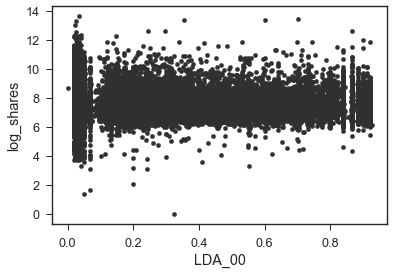

In [27]:
df.plot.scatter('LDA_00', 'log_shares')

In [28]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e3c7b8>]],
      dtype=object)

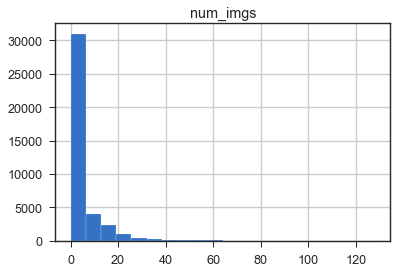

In [29]:
df.hist('num_imgs', bins=20)

In [30]:
df.num_imgs.describe()

count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

In [31]:
len(df[df['num_imgs'] == 0])

6987

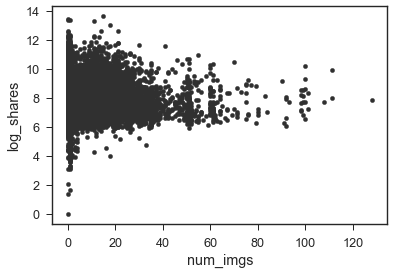

In [32]:
df.plot.scatter('num_imgs', 'log_shares')

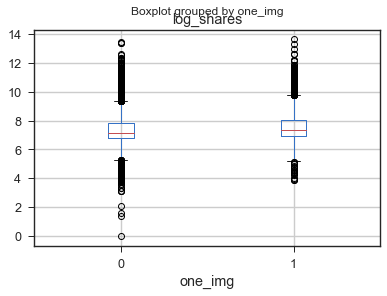

In [33]:
df['one_img'] = np.where(df.num_imgs > 1, 1, 0)
df.boxplot('log_shares', 'one_img')

In [34]:
df.num_videos.describe()

count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

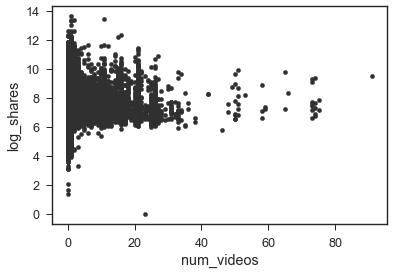

In [35]:
df.plot.scatter('num_videos', 'log_shares')

In [36]:
df.num_links.describe()

count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_links, dtype: float64

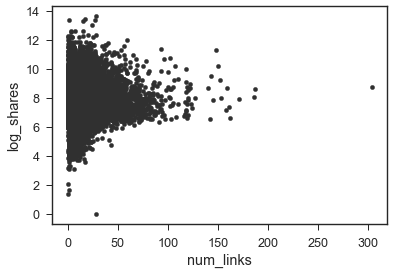

In [37]:
df.plot.scatter('num_links', 'log_shares')

In [38]:
df.num_self_links.describe()

count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_links, dtype: float64

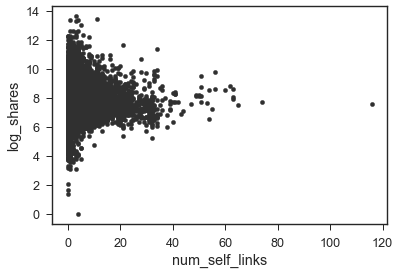

In [39]:
df.plot.scatter('num_self_links', 'log_shares')

In [40]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_max', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'sh

In [41]:
genre_cols = ['lifestyle', 'entertainment', 'business', 'social_media', 'tech', 'world']
day_cols = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

df_genres = df[genre_cols]
df_days = df[day_cols]
df_genres_01 = df[genre_cols]
df_days_01 = df[day_cols]

In [42]:
for col in df_genres.columns:
    df_genres[col] = df_genres[col] * df['shares']

for col in df_days.columns:
    df_days[col] = df_days[col] * df['shares']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
df_genres_01.head()

,lifestyle,entertainment,business,social_media,tech,world
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0


In [44]:
df_genres.head()

,lifestyle,entertainment,business,social_media,tech,world
0,0,593,0,0,0,0
1,0,0,711,0,0,0
2,0,0,1500,0,0,0
3,0,1200,0,0,0,0
4,0,0,0,0,505,0


In [45]:
df_days.head()

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,593,0,0,0,0,0,0
1,711,0,0,0,0,0,0
2,1500,0,0,0,0,0,0
3,1200,0,0,0,0,0,0
4,505,0,0,0,0,0,0


In [46]:
# df_genres = df_genres.reindex(df_genres.mean().sort_values().index, axis=1)
df_genres = df_genres.reindex(df_genres_01.sum().sort_values().index, axis=1)
df_genres_01 = df_genres_01.reindex(df_genres_01.sum().sort_values().index, axis=1)

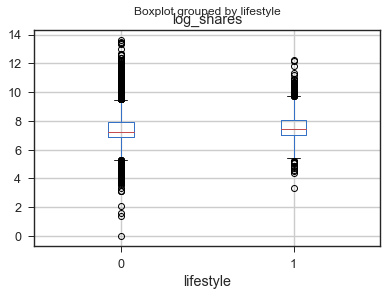

In [47]:
df.boxplot('log_shares', 'lifestyle')

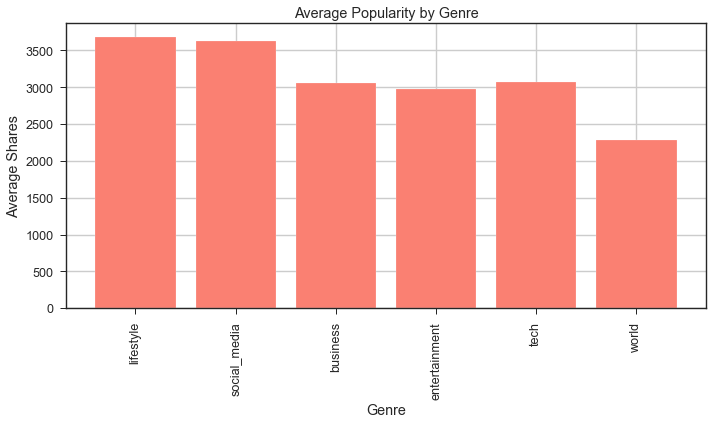

In [48]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres.columns, df_genres.sum()/df_genres.astype(bool).sum(axis=0), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Average Popularity by Genre')
plt.ylabel('Average Shares')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

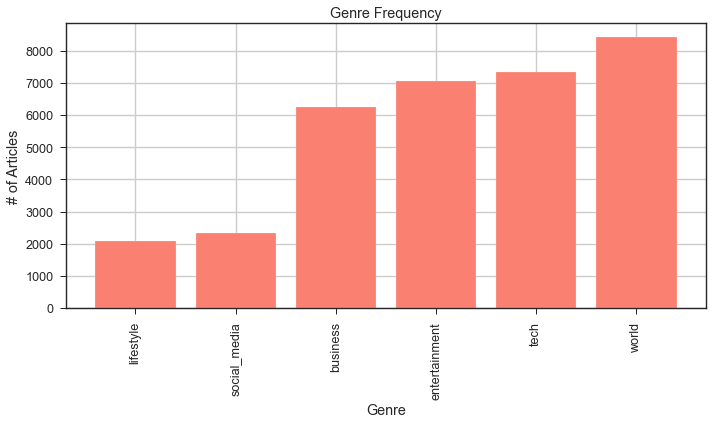

In [49]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres_01.columns, df_genres_01.sum(), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Genre Frequency')
plt.ylabel('# of Articles')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

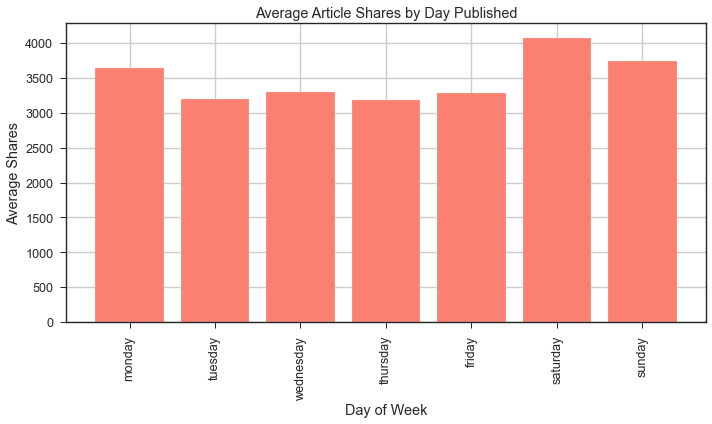

In [50]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days.columns, df_days.sum()/df_days.astype(bool).sum(axis=0), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Average Article Shares by Day Published')
plt.ylabel('Average Shares')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

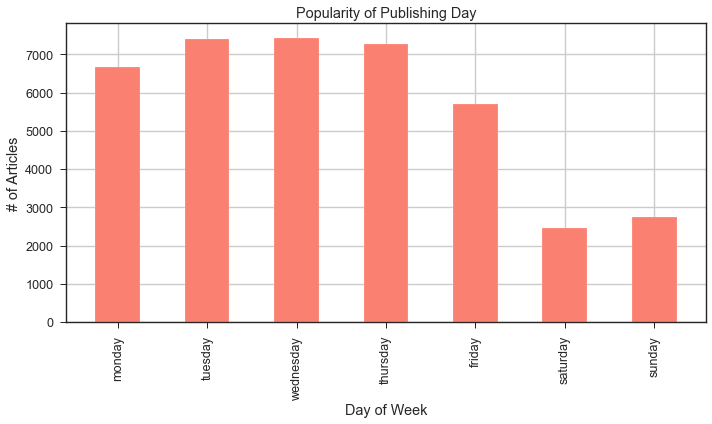

In [51]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days_01.columns, df_days_01.sum(), color='salmon', width=0.5) 
plt.xticks(rotation='vertical')

plt.title('Popularity of Publishing Day')
plt.ylabel('# of Articles')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

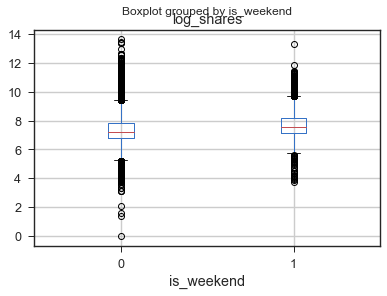

In [52]:
df.boxplot('log_shares', 'is_weekend')

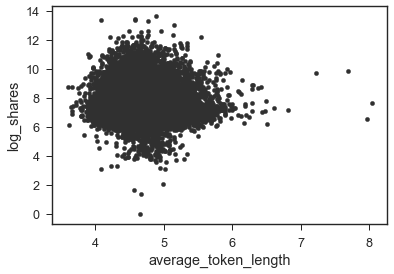

In [53]:
df['average_token_length'] = np.where(df.average_token_length == 0, df.average_token_length.mean(), df.average_token_length)
df.plot.scatter('average_token_length', 'log_shares')

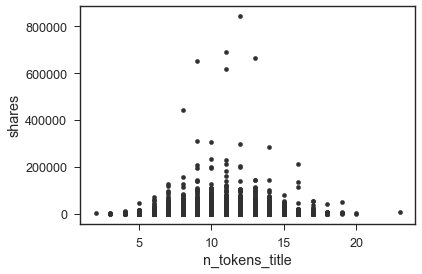

In [54]:
df.plot.scatter('n_tokens_title', 'shares')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125966a20>]],
      dtype=object)

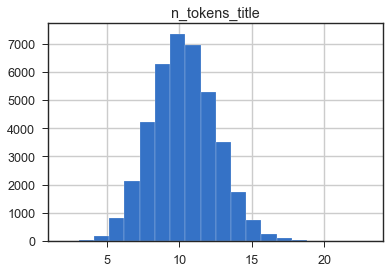

In [55]:
df.hist('n_tokens_title', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129265588>]],
      dtype=object)

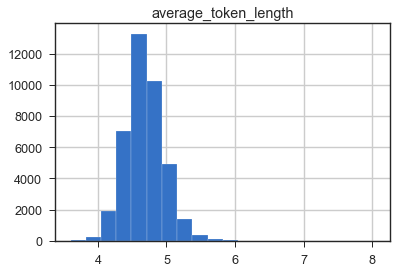

In [56]:
df.hist('average_token_length', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12794cdd8>]],
      dtype=object)

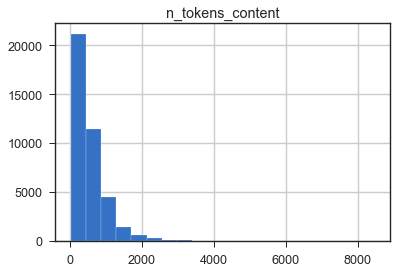

In [57]:
df.hist('n_tokens_content', bins=20)

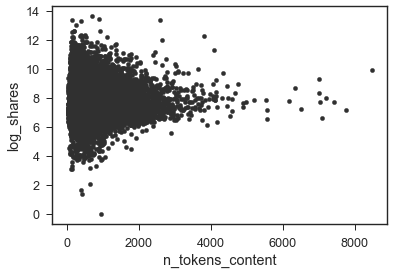

In [58]:
df.plot.scatter('n_tokens_content', 'log_shares')

In [ ]:
df.n_tokens_content.describe()

In [ ]:
df['n_tokens_content'] = np.where(df.n_tokens_content == 0, df.n_tokens_content.median(), df.n_tokens_content)
df.plot.scatter('n_tokens_content', 'log_shares')

In [ ]:
df.rate_unique_tokens.describe()

In [ ]:

df.plot.scatter('rate_unique_tokens', 'log_shares')

In [ ]:
df.hist('rate_unique_tokens')

In [ ]:
df['rate_unique_tokens'].corr(df['shares'])

In [ ]:
df.columns

In [ ]:
df['avg_positive_polarity'].corr(df['avg_negative_polarity'])

In [ ]:
df.columns

In [ ]:
df.boxplot('n_tokens_content', 'is_weekend')

In [ ]:
df.columns

In [ ]:
df.plot.scatter('log_shares', 'timedelta')

In [ ]:
df['world_weekend'] = df['world'] * df['is_weekend']
df.boxplot('log_shares', 'world_weekend')

In [ ]:
df['world_weekend'].sum()

In [ ]:
features.columns

In [ ]:
features.describe()

In [ ]:
def find_extremas(df):
    extrema_list = []
    for column in list(df.columns):
        if df[column]['max'] > ( df[column]['mean']+4*df[column]['std']):
            extrema_list.append(column)
    return extrema_list

descriptor = features_only.describe()
extreme_cols = find_extremas(descriptor)
features[extreme_cols].describe()

In [ ]:
def extreme(df,columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        conditions = [
            df[column] > mean + 4*std]
        df[column] = np.where(df[column] > mean + 4*std, mean + 4*std, df[column])

In [ ]:
extreme(features, extreme_cols)
features.describe()

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
features.drop(columns=['log_kw_avg_max', ], inplace=True)

In [ ]:
target = features['log_shares']
features_only = features.drop(columns='log_shares')
X_train, X_test, y_train, y_test = train_test_split(features_only, target, random_state=42, test_size=0.2)
# random_state=22,

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
regression = LinearRegression()

In [ ]:
continuous = ['n_tokens_title', 'n_tokens_content', 'rate_unique_tokens',
               'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
               'average_token_length', 'num_keywords', 'kw_max_min', 'kw_avg_min',
               'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
               'self_ref_avg_shares',  'LDA_00', 'LDA_01', 'LDA_02',
               'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
               'global_rate_positive_words', 'global_rate_negative_words',
               'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
               'min_positive_polarity', 'max_positive_polarity',
               'avg_negative_polarity', 'min_negative_polarity',
               'max_negative_polarity', 'title_subjectivity',
               'title_sentiment_polarity', 'abs_title_subjectivity',
               'abs_title_sentiment_polarity']
categoricals = ['entertainment', 'business', 'social_media', 'tech', 'world', 'tuesday', 'wednesday', 'thursday',
                'friday', 'saturday', 'sunday', 'is_weekend', 'has_img', 'has_video']

target = y_train.copy()

features_cont = X_train[continuous]

# log features
log_names = [f'{column}_log' for column in features_cont.columns]

features_log = np.log(features_cont)
features_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_log_norm = features_log.apply(normalize)

features_cat = X_train[categoricals]

preprocessed = pd.concat([target, features_cont, features_cat], axis=1)

X = preprocessed.drop('log_shares', axis=1)
y = preprocessed['log_shares']

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

In [ ]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

In [ ]:
with open('train_interactions_list.pickle', 'wb') as f:
    pickle.dump(interactions, f)

In [ ]:
# with open('train_interactions_list.pickle', 'rb') as file:
#     interactions = pickle.load(file)

In [ ]:
len(interactions)

In [ ]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
max_r_squared = X.copy()

for i in interactions:
    max_r_squared[i[0]+'_'+i[1]] = max_r_squared[i[0]] * max_r_squared[i[1]]

max_r2_model = np.mean(cross_val_score(regression, max_r_squared, y, scoring='r2', cv=crossvalidation))

max_r2_model

In [ ]:
max_r2_target = pd.concat([target, max_r_squared], axis=1)

In [ ]:
f_list = list(max_r2_target.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=max_r2_target).fit()
model.summary()

* R-squared value has gone from 0.127 to 0.183, or a 44.1% increase!
* Unfortunately the number of features is far more than the square root (178) of our sample size. Let's simplify and go for the top 100.

In [ ]:
np.sqrt(len(X_train))

In [ ]:
top_100 = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:100]
top_100[-10:]

In [ ]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

for i in top_100:
    X_train[i[0]+'_'+i[1]] = X_train[i[0]] * X_train[i[1]]

final_model = np.mean(cross_val_score(regression, X_train, y, scoring='r2', cv=crossvalidation))

final_model

In [ ]:
final_target = pd.concat([target, X_train], axis=1)

In [ ]:
f_list = list(final_target.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=final_target).fit()
model.summary()

In [ ]:
for i in top_100:
    X_test[i[0]+'_'+i[1]] = X_test[i[0]] * X_test[i[1]]

In [ ]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=f_list)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=f_list)

In [ ]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = np.exp(lm.predict(X_train))

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

y_pred = np.exp(lm.predict(X_test))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

In [ ]:
sns.residplot(y_test, y_pred, lowess=True, color="g")

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=5)

selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [ ]:
selected_columns

In [ ]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = np.exp(lm_kbest.predict(X_train[selected_columns]))


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = np.exp(lm_kbest.predict(X_test[selected_columns]))

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

In [ ]:
sns.residplot(y_test, y_kbest, lowess=True, color="g")

In [ ]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred_lasso = np.exp(lasso.predict(X_train))
y_pred_lasso = np.exp(lasso.predict(X_test))

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [ ]:
coefficient = lasso_coef01.T
coefficient[coefficient[0] != 0]

In [ ]:
sns.residplot( y_test, y_pred_lasso, lowess=True, color="g")

In [ ]:
X_train.corr() > .9

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})